In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [2]:
def import_dataset(split_percent = 70):
    # dataset = pd.read_csv('E:\ELL_Project\problem2\weather_data.csv')     
    dataset = pd.read_excel('E:\ELL_Project\problem2\weather_data.xlsx')                     
    dataset = dataset.sample(frac = 1)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1:].values
    datasize = X.shape[0]

    split_point = split_percent//10

    X_train = X[:(datasize*split_point)//10,:]
    y_train = y[:(datasize*split_point)//10,:]
    X_test = X[(datasize*split_point)//10:,:]
    y_test = y[(datasize*split_point)//10:,:]

    return(X_train,X_test,y_train,y_test)


In [3]:
def feature_scaling(X_train):
    training_size = X_train.shape[0]
    X_mean = np.sum(X_train,axis=0) / training_size
    X_var = np.sqrt(np.sum((np.square(X_train-X_mean)),axis=0)/training_size)
    X_train_reg = (X_train - X_mean) / X_var

    return (X_mean,X_var,X_train_reg)


In [96]:
def parsen_window(X_train,y_train,X_test,y_test,window_size,feat_scal = True):

    y_train_avg = np.sum(y_train)/ y_train.shape[0]
    test_size = X_test.shape[0]
    train_size = X_train.shape[0]
    # X_m,X_v,X_r,y_m,y_v,y_r = feature_scaling(X_train,y_train)
    if feat_scal:
        X_m,X_v,X_r = feature_scaling(X_train)
        X_test_reg = (X_test-X_m)/X_v
    else:
        X_r = X_train
        X_test_reg = X_test
    # y_test_reg = (y_test-y_m)/y_v
    y_pred = np.array([])
    # print(y_pred)
    for i in range(test_size):
        sample_X = X_test_reg[i:i+1,:]
        sample_y = y_test[i,:]
        dist_vec = np.sqrt(np.sum(np.square(X_r-sample_X),axis=1))
        dist_vec = dist_vec.reshape((train_size,1))
        # print(dist_vec.shape)
        # print(y_train.shape)
        hyp_cube = y_train[dist_vec[:,0]<=window_size,0]
        y_temp_pred = 0
        if(hyp_cube.shape[0]==0):
            y_temp_pred = y_train_avg
        else:
            y_temp_pred = np.sum(hyp_cube,axis=0) / hyp_cube.shape[0]
        y_pred = np.append(y_pred,y_temp_pred)
        # print(y_pred)
        # if(y_pred==0):
        #     print('yes')
        # break
    
    return y_pred.reshape(-1,1)
        



In [97]:
def accuracy(y_pred,y_test,Print=True):

    mse_loss = np.sum(np.square((y_test-y_pred)),axis=0) / y_test.shape[0]
    mae_loss = np.sum(np.abs((y_test-y_pred)),axis=0) / y_test.shape[0]
    # y_pred = y_pred.reshape(-1,1)
    if Print:
        print('MSE LOSS')
        print(mse_loss)
        print('............................................................................')
        print('MAE LOSS')
        print(mae_loss)
    # print('............................................................................')
    else:
        return (mse_loss,mae_loss)

In [124]:
def hyper_tuning(X_train,X_test,y_train,y_test):
    mse_loss_variation = []
    a = np.arange(0,100,0.2)
    min_val = 10000000
    min_index = -1
    for i in a:
        y_pred = parsen_window(X_train,y_train,X_test,y_test,i,False)
        mse_loss,_ = accuracy(y_pred,y_test,False)
        if(mse_loss<min_val):
            min_index = i
            min_val = mse_loss
        mse_loss_variation.append(mse_loss)
    
    plt.plot(a, mse_loss_variation, 'g')
    # plt.plot(pow_l, train_l, 'b')
    plt.show()

    return(min_index)

    

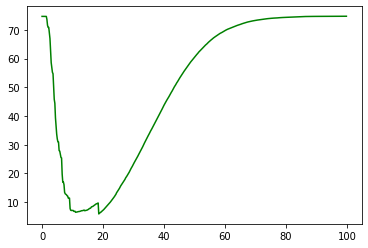

MSE LOSS
[5.90410845]
............................................................................
MAE LOSS
[1.77207482]


In [125]:
X_train,X_test,y_train,y_test = import_dataset()
min_p = hyper_tuning(X_train,X_test,y_train,y_test)
y_pred = parsen_window(X_train,y_train,X_test,y_test,min_p,False)
accuracy(y_pred,y_test)